<h1><center>Red Wine Quality Analysis - Fitting a Statistical 
Model</center></h1>
<center>June 2024</center>
<center>Celine Ng</center>

# Table of Contents

1. Project Introduction   
    1. Libraries Installation
    1. Dataset
    1. Data Cleaning
1. EDA
    1. Distribution
        1. Summary
    1. Correlation
        1. Summary
    1. Data Transformation
    1. Multicollinearity
        1. Summary
1. Data Splitting - Training and Testing Dataset
1. Regression
    1. Initial Model Choosing
        1. [Summary]
    1. Regression
        1. Summary
    1. Assumptions
    1. Assess fit
    1. Inferences

1. [Improvements]

# 1. Project Introduction

The outcome variable is categorized and ordered. Therefor, the Ordinal <br>
Logistic Regression will be applied. The significance level, is set <br>
at alpha=0.05. <br>
<br>
**(H0) Null Hypothesis:** There is no significant factor in our features that 
<br>
influence the red wine quality score. <br>
<br>
**(H1) Alternative Hypothesis:** There is at least one significant factor in
 our
 <br>
 features that influence the red wine quality score. <br>

## 1.1 Libraries Installation

In [148]:
%%capture
%pip install -r requirements.txt

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.preprocessing import StandardScaler

## 1.2 Dataset

The dataset was downloaded from kaggle, [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) <br>
on June 20th. The dataset is related to the red variants of the Portuguese <br>
"Vinho Verde" wine from the north of Portugal. For the original data, see <br>
[Cortez et al., 2009](http://www3.dsi.uminho.pt/pcortez/wine/).

In [150]:
redwinequality = pd.read_csv('data/winequality.csv')

In [151]:
redwinequality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Input variables obtained from physicochemical tests (continuous data): <br>
1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>
<br>
Output variable (integer data): <br>
12 - quality (score between 0 and 10)

1. How big is our dataset?

In [152]:
redwinequality.shape

(1599, 12)

2. Datatypes

In [153]:
redwinequality.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## 1.3 Data Cleaning

1. Any missing values?

In [154]:
print(redwinequality.isna().any().any())

False


2. Duplicates

In [155]:
print(redwinequality.duplicated().any())

True


In [156]:
redwinequality[redwinequality.duplicated()].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


In [157]:
redwinequality[redwinequality.duplicated()].count()

fixed acidity           240
volatile acidity        240
citric acid             240
residual sugar          240
chlorides               240
free sulfur dioxide     240
total sulfur dioxide    240
density                 240
pH                      240
sulphates               240
alcohol                 240
quality                 240
dtype: int64

It is unclear if these duplicates are from the same wine or they are <br>
different wines but with very similar characteristics. For the purpose of <br>
this project, we will leave it as it is. <br>

# 2. EDA

Objective: Brief understanding of the dataset and possible relationship <br>
between columns

Dataset descriptive statistics overview

In [158]:
redwinequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2.1 Distribution

Objective:
1. Understand visually the distribution and outliers of our features and the
 <br>
quality of wine. 
2. Include mean(red )and median(blue) in the graphs to showcase the 
influence <br>
 of outliers, skewness in each case.

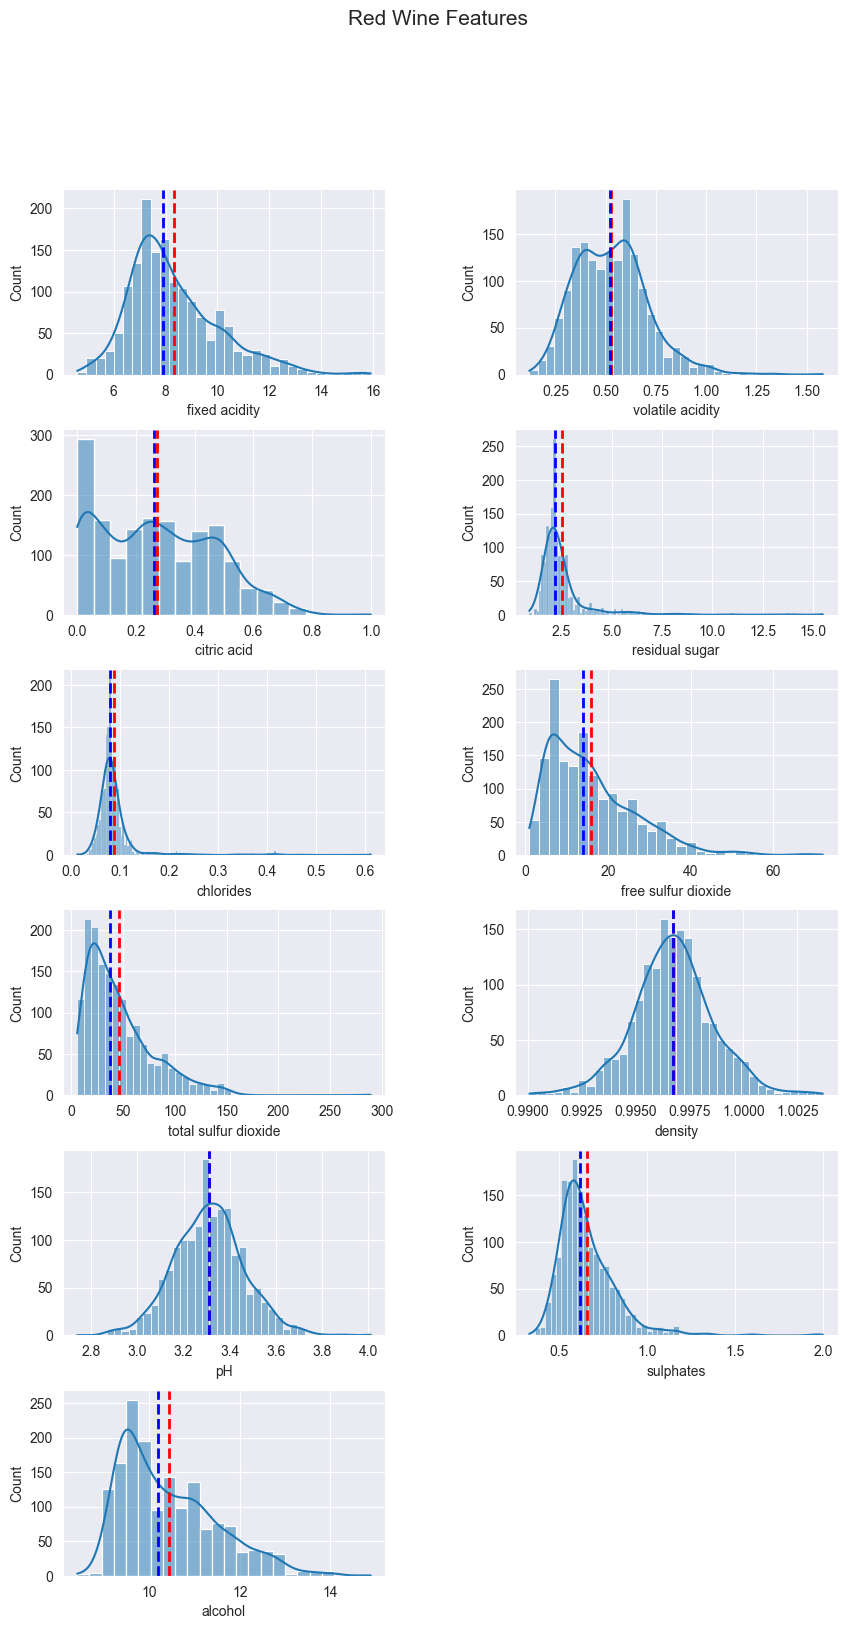

In [159]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 18))
fig.subplots_adjust(hspace=0.3, wspace=0.4)

axes_flatten = axes.flatten()

for i, col in enumerate(redwinequality.columns):
    if col != 'quality':
        sns.histplot(x=col, data=redwinequality, kde=True, ax=axes_flatten[i])
        mean_value = redwinequality[col].mean()
        axes_flatten[i].axvline(mean_value, color='r', linestyle='--', linewidth=2)
        median_value = redwinequality[col].median()
        axes_flatten[i].axvline(median_value, color='b', linestyle='--', 
                                linewidth=2)
        sns.despine(top=True, right=True, left=False, bottom=False)
    else:
        axes_flatten[i].axis('off')
    
fig.suptitle('Red Wine Features', fontsize=15)

plt.show()

To visualize outliers better

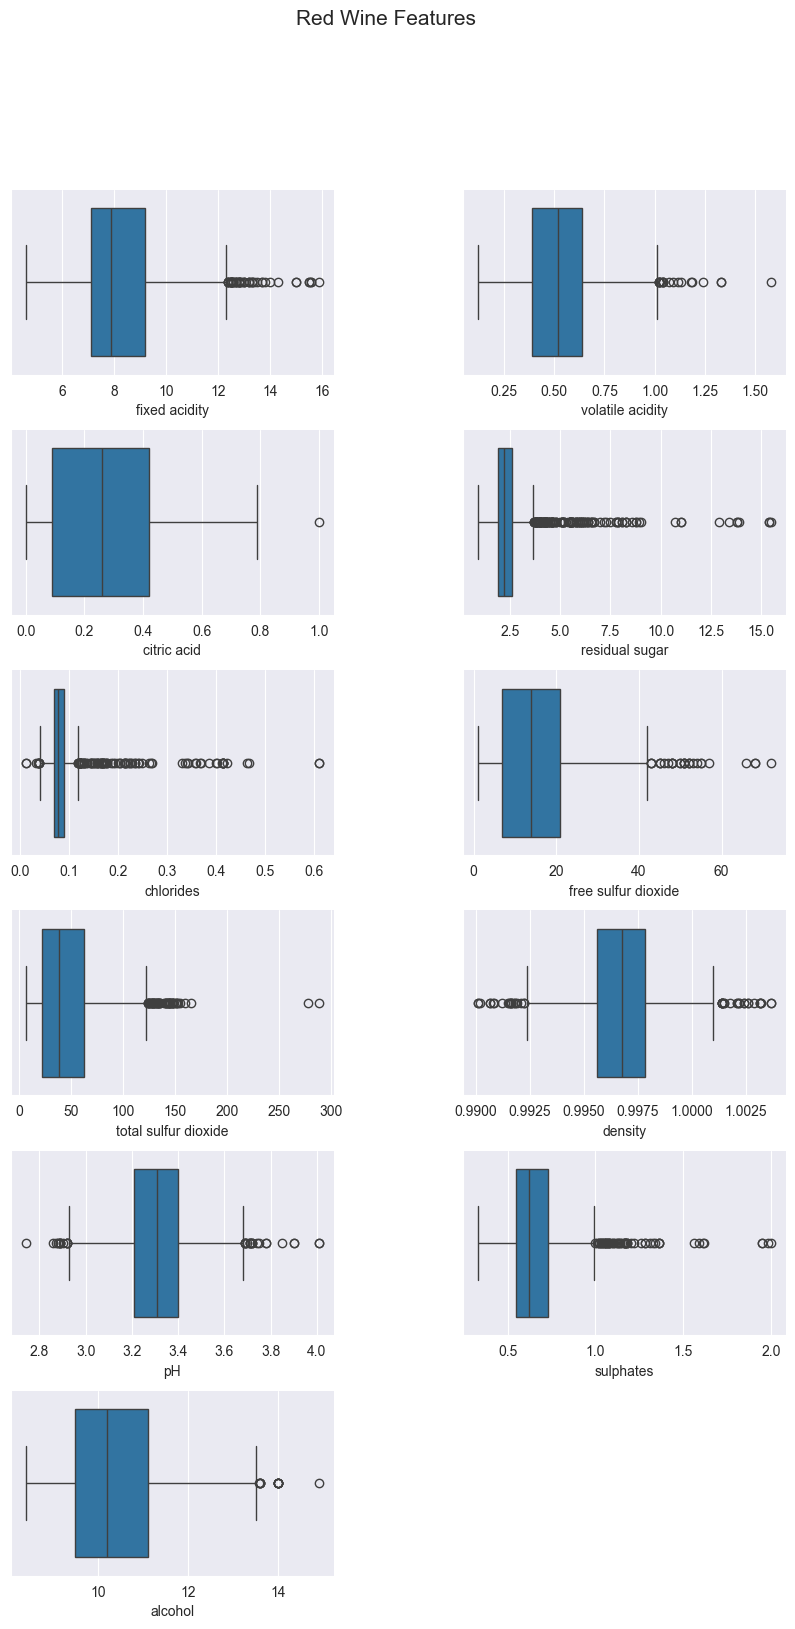

In [160]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 18))
fig.subplots_adjust(hspace=0.3, wspace=0.4)

axes_flatten = axes.flatten()

for i, col in enumerate(redwinequality.columns):
    if col != 'quality':
        sns.boxplot(x=col, data=redwinequality, ax=axes_flatten[i])
        sns.despine(top=True, right=True, left=False, bottom=False)
    else:
        axes_flatten[i].axis('off')
    
fig.suptitle('Red Wine Features', fontsize=15)

plt.show()

From the descriptive statistics overview and the distribution, we confirm
 <br>
 several features follow a close to normal distribution. For example, pH, <br>
 density and volatile acidity. <br>
However, others have a larger difference between mean and median. In some 
case <br>
 seem to be the outliers. For example for sulphates, chlorides, and residual
  sugar. <br>
  For other cases, the difference are possibly due to their not <br>
  normal distribution shape and skewness. For example, fixed acidity, citric
   <br>
   acid, etc.

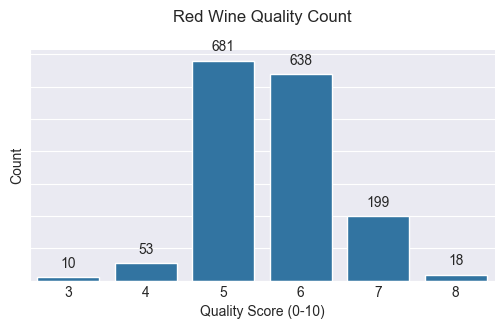

In [161]:
plt.figure(figsize=(6, 3))
ax = sns.countplot(data=redwinequality, x='quality')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', xy=(p.get_x() + p.get_width() / 2,
                                              p.get_height()), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

sns.despine(top=True, right=True, left=False, bottom=False)
ax.tick_params(axis='x', which='both', length=0, labelbottom=True)
ax.tick_params(axis='y', which='both', length=0, labelleft=False)
plt.ylabel('Count')
plt.xlabel('Quality Score (0-10)')
plt.title('Red Wine Quality Count', pad=20)
plt.show()

### 2.1.1 Summary

1. Most features have skewed distribution or contain a large amount of <br>
outliers.
2. The quality score is not visually skewed and contains only values between
 <br>
 3 and 8, with 5 being the mode.

## 2.2 Correlation
Objective:
1. Understand the possible relationship between features and quality.
2. Correlation coefficients

**Scatter plots with Quality**

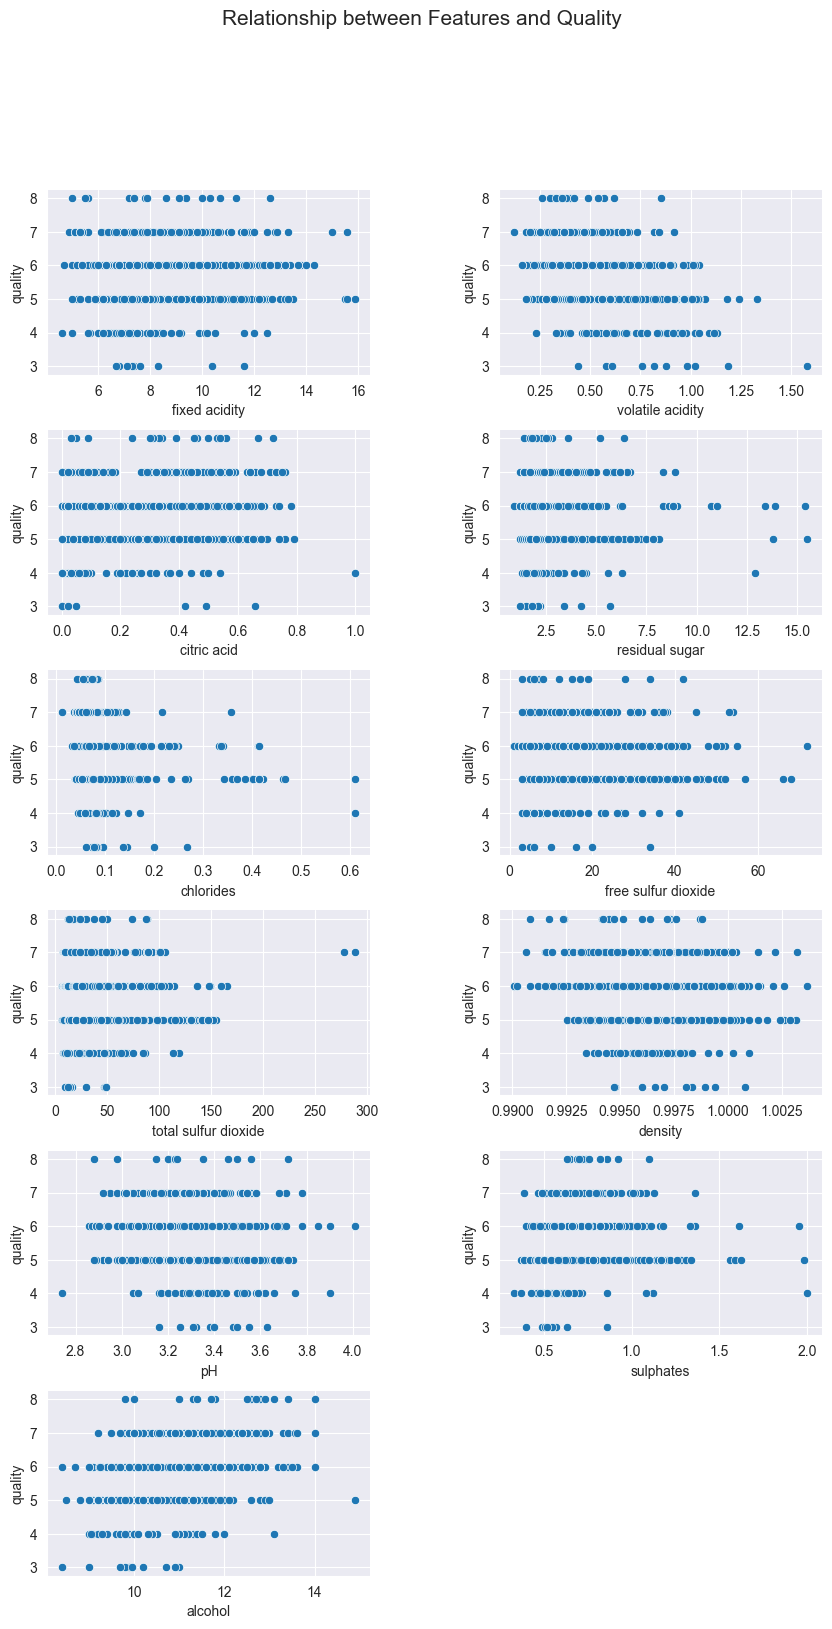

In [162]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 18))
fig.subplots_adjust(hspace=0.3, wspace=0.4)

axes_flatten = axes.flatten()

for i, col in enumerate(redwinequality.columns):
    if col != 'quality':
        sns.scatterplot(x=col, y='quality', data=redwinequality,
                        ax=axes_flatten[i])
        sns.despine(top=True, right=True, left=False, bottom=False)
    else:
        axes_flatten[i].axis('off')
    
fig.suptitle('Relationship between Features and Quality', fontsize=15)

plt.show()

There are some correlation tendencies with certain features.

**Correlation Matrix - Pearson correlation**

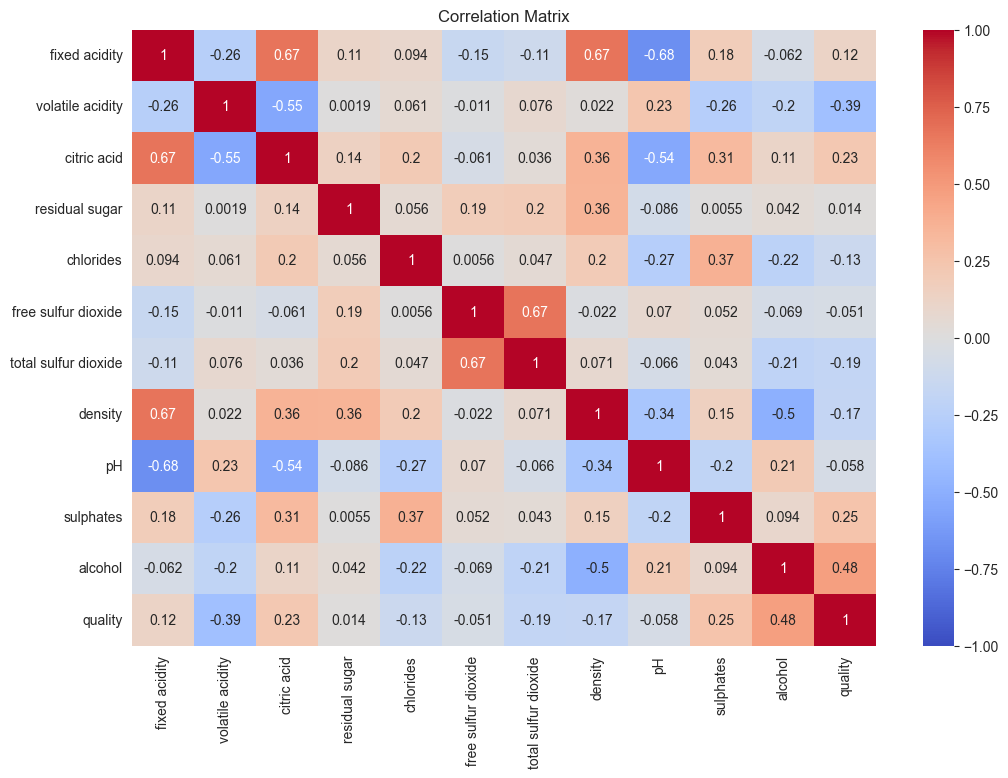

In [163]:
correlation_matrix = redwinequality.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            center=0)
plt.title('Correlation Matrix')
plt.show()

Features: <br>
Between features themselves, there is collinearity even if most correlations
 <br>
are weak, and the 3 strongest ones are all correlated with fixed acidity. <br>
Being r=0.67 with citric acid, r=0.67 with density and r=-0.68 with pH. <br>

Response: <br>
There are no strong correlation with Quality. The best 2 correlations are <br>
weak to moderate, the features are alcohol and volatile acidity. <br>
Comparing these 2 features, we see that alcohol has 6 weak to moderate 
<br>
correlations with others features, while volatile acidity has 5, and the <br>
rest are very weak (between -0.1 and 0.1).

### 2.2.1 Summary

1. From the scatter plots there are promising tendencies which show <br>
correlations between features and the outcome. 
2. From the correlation matrix, the majority of correlations are weak and <br>
come are weak to moderate. The outcome is also only moderately correlated <br>
with 2 features. However, there is signs of multicolliearity as each feature
 <br>
has *some* correlation with a lot of other features.

## 2.3 Data Transformation
Objective: <br>
Normalize variables so all have mean of 0 and standard deviation 
<br>
of 1. This will facilitate results interpretation as our variables were not 
<br>
all normally distributed, previously visually inspected.

In [164]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target = 'quality'

scaler = StandardScaler()
X_scaled = scaler.fit_transform(redwinequality[features])

X_scaled_df = pd.DataFrame(X_scaled, columns=features)
y = redwinequality[target]

## 2.4 Multicollinearity
Objective:
Check if features are correlated. As correlation between features makes 
<br>
it difficult to understand how each feature individually affect the <br>
response, wine quality.  

**Variance Inflation Factor (VIF)**

In [165]:
X_with_constant = sm.add_constant(X_scaled_df)

vif_data = pd.DataFrame()
vif_data["feature"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range
(X_with_constant.shape[1])]

vif_data

,feature,VIF
0,const,1.000000
1,fixed acidity,7.767512
2,volatile acidity,1.789390
3,citric acid,3.128022
4,residual sugar,1.702588
5,chlorides,1.481932
6,free sulfur dioxide,1.963019
7,total sulfur dioxide,2.186813
8,density,6.343760
9,pH,3.329732


Generally, VIF value exceeding 5 are considered a problematic amount of <br>
collinearity. <br>
1. Fixed acidity and density had VIF values of 7.77 and 6.34, which are <br>
extremely high, but coherent as both had several moderate correlations with 
<br>
other features shown on the correlation matrix. <br>
2. Citric acid, pH and alcohol scored moderate VIF values around 3
3. Other features had lower values which should not cause a concern. <br>

As Fixed Acidity has the highest VIF value and also is feature with the <br>
strongest correlations with other features, we will drop it. This should 
help <br>
 the multicollinearity situation in other features without compromising the 
 <br>
 regression.

**Variance Inflation Factor (VIF) without 'Fixed Acidity'**

In [170]:
X = X_scaled_df.drop(columns='fixed acidity')
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,1.000000
1,volatile acidity,1.784963
2,citric acid,2.780557
3,residual sugar,1.386375
4,chlorides,1.401232
5,free sulfur dioxide,1.939209
6,total sulfur dioxide,2.069396
7,density,2.430096
8,pH,1.610775
9,sulphates,1.396382


Dropping 'Fixed Acidity' has reduced collinearity in several features. <br>
However, some features still remain with a moderate high VIF: <br>
(2.8) citric acid <br> ph. volatile acidity, density, sulfates, alcohol
(1.9) free sulfur dioxide <br> total sulfur, residual sugar
(2.1) total sulfur dioxide <br> free sulfur, alcohol, residual sugar
(2.4) density <br> citric acid, residual sugar, ph, alcohol, chlorides, 
sulphate
(2.1) alcohol<br> density, chlorides, total sulfur, ph


# 3. Data Splitting - Training and Testing Dataset
Objective: Splitting dataset into 2 datasets to later assess model using <br>
testing dataset.

**Ordinal Logistic Regression - Model Fitting**

In [168]:
target = 'quality'
features = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

# Define the explanatory and response variables
X = redwinequality[features]
y = redwinequality[target]

# Fit the ordinal logistic regression model
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.962237
         Iterations: 88
         Function evaluations: 92
         Gradient evaluations: 92
                             OrderedModel Results                             
Dep. Variable:                quality   Log-Likelihood:                -1538.6
Model:                   OrderedModel   AIC:                             3107.
Method:            Maximum Likelihood   BIC:                             3188.
Date:                Mon, 24 Jun 2024                                         
Time:                        19:26:00                                         
No. Observations:                1599                                         
Df Residuals:                    1584                                         
Df Model:                          10                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

# Improvement

1. Use scatterplot to show correlation between variables.
2. 